minimise ||Ax-b|| 

l1 norm is just the sum of values
l2 norm is sqrt(sum of squares) 
l_inf norm is (sum of values ^inf)^/inf which is just the maximum value

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import multiprocessing as mp
import seaborn as sns
sns.set()
sns.set_context('poster')

from scipy.optimize import linprog

In [2]:
A1 = sio.loadmat('./data/A1.mat')["A1"]
A2 = sio.loadmat('./data/A2.mat')["A2"]
A3 = sio.loadmat('./data/A3.mat')["A3"]
A4 = sio.loadmat('./data/A4.mat')["A4"]
A5 = sio.loadmat('./data/A5.mat')["A5"]

b1 = sio.loadmat('./data/b1.mat')["b1"]
b2 = sio.loadmat('./data/b2.mat')["b2"]
b3 = sio.loadmat('./data/b3.mat')["b3"]
b4 = sio.loadmat('./data/b4.mat')["b4"]
b5 = sio.loadmat('./data/b5.mat')["b5"]

all_A = [A1, A2, A3, A4, A5]
all_b = [b1, b2, b3, b4, b5]
pairs = list(zip(all_A, all_b))

In [8]:
# 1 norm
# A is mxn, x is n, b is m
norms_1 = []
residuals_1 = []
runtimes_1 = []
for current_A, current_b in pairs:

    A = np.append(-current_A, current_A, axis=0)
    A = np.append(A, np.append(np.eye(current_A.shape[0]), np.eye(current_A.shape[0]), axis=0), axis=1)

    c = np.append(np.zeros(current_A.shape[1]), np.ones(current_A.shape[0]), axis=0)
    b = np.append(-current_b, current_b, axis=0).flatten()

    results_1 = linprog(c=c, A_ub=-A, b_ub=-b)
    
    norms_1.append(results_1["fun"])
    current_residuals = np.matmul(current_A, results_1["x"][:current_A.shape[1]]) - current_b.flatten()
    residuals_1.append(current_residuals)
    runtimes_1.append(results_1["nit"])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


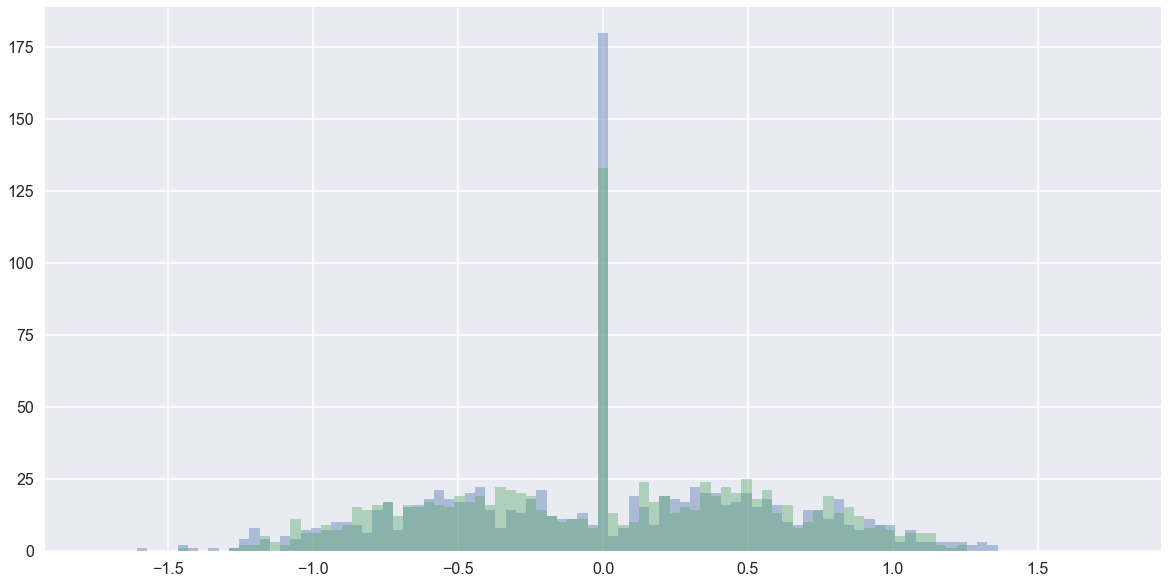

In [9]:
plt.figure(figsize=(20,10))
sns.distplot(residuals_1[4][:A5.shape[1]], bins=np.linspace(-1.75, 1.75, 100), kde=False)
sns.distplot(residuals[4][:A5.shape[1]], bins=np.linspace(-1.75, 1.75, 100), kde=False)

In [6]:
def backtrack(f, grad, x, dx, alpha = 0.5, beta = 0.8, maxiter = 50):
    """Performs a backtracking line search, which, starting at t=1, repeats t = beta t until
    f(x + t*dx) < f(x) + alpha * t * grad(x) * dx.

    f(x) must be one dimensional
    grad(x) and dx are vectors of the same length.
    See lecture 4 pg 6"""

    t = 1
    iters = 0
    while iters < maxiter:
        # print(f(x + t * dx) ,f(x) + 10 * t * grad(x) @ dx
        #       )
        if f(x + t * dx) < f(x) + alpha * t * grad(x) @ dx: # t found
            return t
        t *= beta
        iters += 1

    print(f"Backtracking line search - Max Iter {maxiter} exceeded")
    return t # return t if no solution found

def backtrack_with_vis(f, grad, x, dx, alpha = 0.5, beta = 0.8, maxiter = 50):
    """Performs a backtracking line search, which, starting at t=1, repeats t = beta t until
    f(x + t*dx) < f(x) + alpha * t * grad(x) * dx.

    f(x) must be one dimensional
    grad(x) and dx are vectors of the same length.
    See lecture 4 pg 6

    This function visualises the backtracking algorithm working"""

    xrange = np.arange(0, 1, 0.01)
    plt.plot(xrange, f(xrange))

    colours = ["blue", "green", "red", "orange", "black"]

    t = 1
    iters = 0
    while iters < maxiter:
        plt.axhline(f(x) + alpha * t * grad(x) @ dx, color = colours[iters], label=iters)
        if f(x + t * dx) < f(x) + alpha * t * grad(x) @ dx: # t found
            plt.legend()
            plt.show()
            return t
        t *= beta
        iters += 1
        plt.scatter(x+t*dx, f(x+t*dx), label=iters, color = colours[iters])


    plt.show()
    print(f"Backtracking line search - Max Iter {maxiter} exceeded")
    return t # return t if no solution found

def grad_descent(f, grad, x0, soln=[], objective=None, threshold = 0.005, maxiter = 20):
    """Run gradient descent method.
    f(x) takes x (size n) and returns a scalar
    grad(x) takes x (size n) and returns a vector size n
    x0 is size n of floats.

    Soln used for debugging (known solution to compare errors)"""

    iters = 0

    obj_values = [] # to be stored with values from function objective if it is not none
    f_values = [] # f(xk) for all k

    # Gradient descent method steps
    x = x0 # starting point

    alpha, beta = 0.5, 0.1
    while (grad(x)**2).sum()**0.5 > threshold and iters < maxiter:
        dx = - grad(x)
        t = backtrack(f, grad, x, dx, alpha = alpha, beta = beta) # OLD a = 0.5, b = 0.9
        x += t * dx
        iters += 1
        # print(f"-----{iters}--------")
        # print(t)
        f_values.append(f(x))
        obj_values.append(objective(x))

    print(f"GRAD FINISHED. ITERS = {iters}")

    if soln == []: soln = x
    return {"x": x, "errors": [abs(f(soln) - obj) for obj in f_values], "objectives": obj_values}





In [7]:
from time import perf_counter

In [9]:
row_to_col = lambda arr: np.reshape(arr, (len(arr), 1))

GRAD FINISHED. ITERS = 100
SOLN NORM = 171.84625334394983
TOTAL RUNTIME = 5.516630851023365 s


ValueError: 
\left\lVert Ax_k -b \right\rVert_1
     ^
Expected a delimiter (at char 5), (line:1, col:6)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x113905488> (for post_execute):


ValueError: 
\left\lVert Ax_k -b \right\rVert_1
     ^
Expected a delimiter (at char 5), (line:1, col:6)

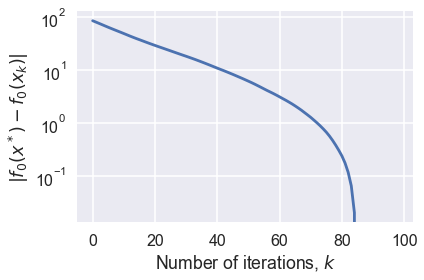

ValueError: 
\left\lVert Ax_k -b \right\rVert_1
     ^
Expected a delimiter (at char 5), (line:1, col:6)

<Figure size 432x288 with 1 Axes>

In [11]:
A, b = A3, b3
b = np.squeeze(b)

# f0 = c~^t x~
# A~ x~ <= b~
# Where ~ functions as defined in question 1
# This becomes a minimisation problem by converting inequality to phi conditions

m, n = A.shape

tstart = perf_counter()

#Cbar = m zeros, 1 1
cbar = np.array([0.0]*n + [1.0]*m)

#Abar = [-A, I, \\ A, I]
Abar = np.ones((2*m, n+m))
Abar[0:m, 0:n] = -A
Abar[m:, 0:n] = A
Abar[0:m, n:] = np.eye(m)
Abar[m:, n:] = np.eye(m)

#bbar = [-b, b]
bbar = np.zeros(2*m)
bbar[0:m] = -b
bbar[m:] = b

objective = lambda x: np.abs(A @ row_to_col(x[:n]) - row_to_col(b)).sum()

t = 1

f0 = lambda x: cbar @ x
grad_f0 = lambda x: cbar

# See pg 565 on https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf for ref
def phi(x):
    # print(min(bbar[i] - Abar[i] @ x for i in range(0, 2*m)))
    return - sum(np.log(Abar[i].dot(x) - bbar[i]) for i in range(0, 2*m))

grad_phi = lambda x:  sum(Abar[i]/(bbar[i] - Abar[i].dot(x)) for i in range(0, 2*m))

grad = lambda x: (t * grad_f0(x) + grad_phi(x))
func = lambda x: (t * f0(x) + phi(x))

x0 = np.array([0.0] * n + [100.0] * m) # x = [x1, x2, x3... t1, t2, t3 ...]

solve = grad_descent(func, grad, x0, objective=objective, maxiter = 100)
soln, errors, objectives = solve["x"], solve["errors"], solve["objectives"]

print(f"SOLN NORM = {objective(soln)}")
print(f"TOTAL RUNTIME = {perf_counter() - tstart} s")

# Plot and save fig of convergence analysis
plt.figure()
plt.semilogy([obj - objectives[-1] for obj in objectives[:-1]], "-")
plt.ylabel(r"$\vert f_0(x^*) - f_0(x_k) \vert$")
plt.xlabel(r"Number of iterations, $k$")
# plt.ylim(10**1, 10**5)
plt.tight_layout()
#
# # Plot and save fig of norm over iterations
plt.figure()
plt.plot(objectives, "-o", ms = 2)
plt.ylabel(r"$\left\lVert Ax_k -b \right\rVert_1$")
plt.xlabel(r"Number of iterations, $k$")
plt.tight_layout()
